In [126]:
#Importing the recquired Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [127]:
#Importing the Dataset 
data=pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [128]:
#Data Exploration 
data.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [129]:
#Checking For Null values 
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [130]:
#Descriptive Analysis 
data.shape

(600, 6)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [132]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [133]:
#Feature Engineering 
#First renaming the column names 
data=data.rename(columns={'Marital.Status':'martial_status','Taxable.Income':'taxable_income',
                          'City.Population':'city_population','Work.Experience':'work_experience'})
data

,Undergrad,martial_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [134]:
#Creating a new column as instructed for those who have taxable_income <= 30000 as "Risky=1" and others are "Good=0"
#For same purpose first viuslation the range of values in column taxable income 
data['taxable_income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: taxable_income, dtype: float64

In [135]:
#Hence min = 10003.000000, max=99619.000000 accordingly we create a column 
data['tax_category']=pd.cut(data['taxable_income'],bins=[10000,30000,99619],labels=['Risky','Good'])
data.head()

,Undergrad,martial_status,taxable_income,city_population,work_experience,Urban,tax_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [136]:
data['tax_category'].value_counts()

Good     476
Risky    124
Name: tax_category, dtype: int64

<Figure size 720x720 with 0 Axes>

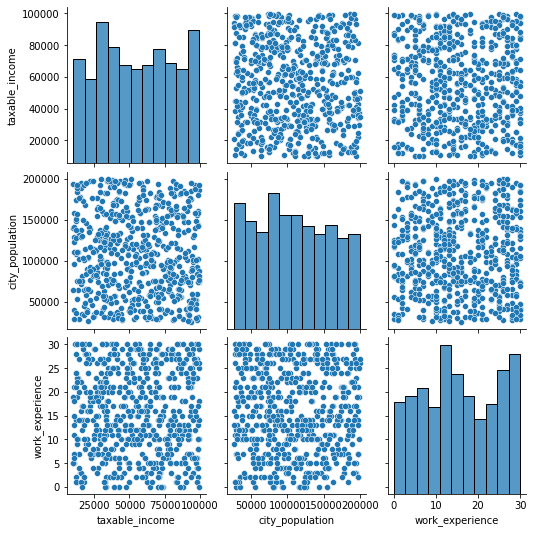

In [137]:
#Data Visualization 
plt.figure(figsize=(10,10))
sns.pairplot(data,palette='coolwarm')
plt.show()

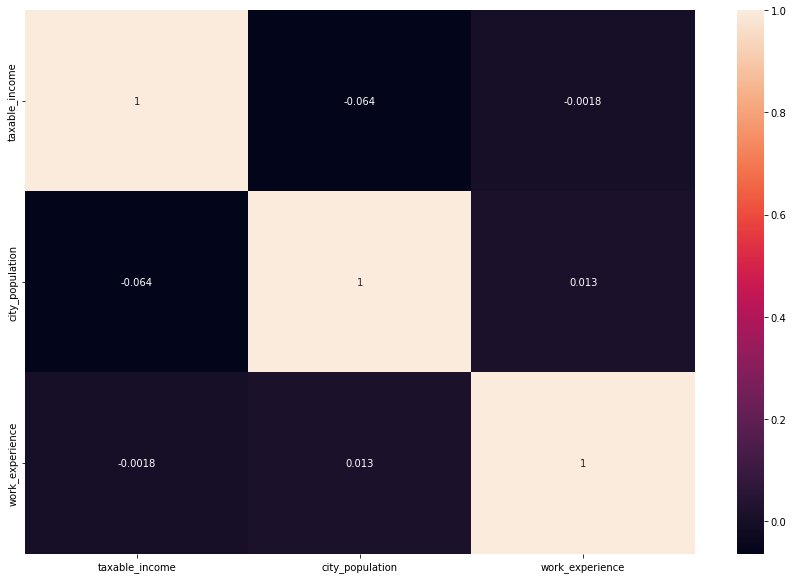

In [138]:
#Checking Correlation 
fig=plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

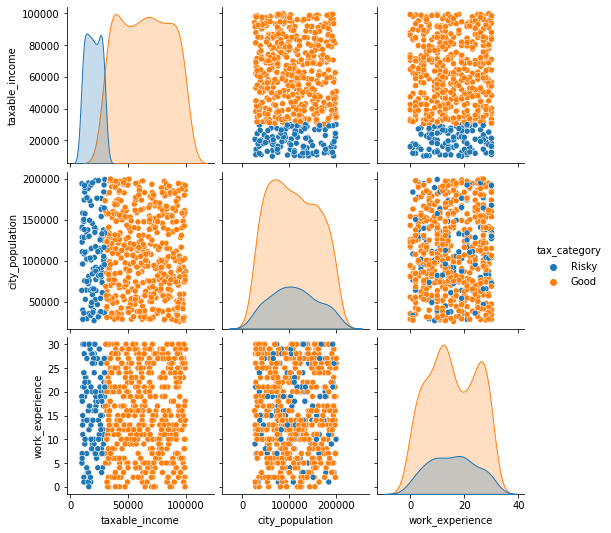

In [139]:
#visualize all independent and dependent variable pairplot 
sns.pairplot(data=data,hue='tax_category')

In [140]:
#Creating Dummy variables of categorical variables 
#but First keep the value counts in note 
data['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [141]:
categorical_features = data.describe(include=["object"]).columns
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'martial_status', 'Urban', 'tax_category'], dtype='object')

In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

,Undergrad,martial_status,taxable_income,city_population,work_experience,Urban,tax_category
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [143]:
data['Undergrad'].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [144]:
#Splitting the data into train and test and Separation of independent variables from dependent 
x=data.drop(['tax_category'],axis=1)
y=data['tax_category']

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [148]:
#Building the Decision Tree Model
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.75, 'X[2] <= 30055.5\nentropy = 0.73\nsamples = 480\nvalue = [382, 98]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 98\nvalue = [0, 98]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 382\nvalue = [382, 0]')]

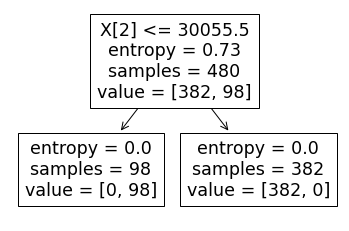

In [149]:
#Plotting the Decision Tree Raw without function and column names 
tree.plot_tree(model)

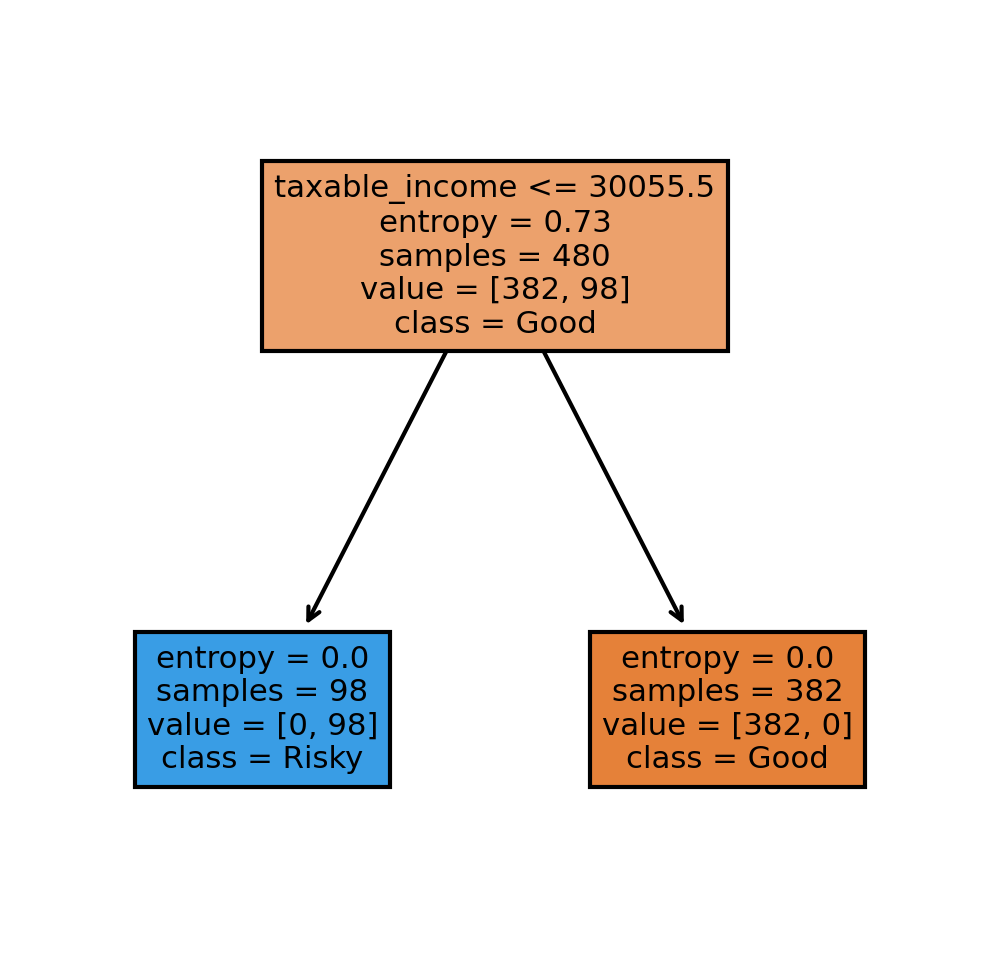

In [150]:
#plotting The Decision Tree again with Proper column names and function
fn=['Undergrad','martial_status','taxable_income','city_population','work_experience','Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);

In [152]:
#Predicting the test data 
ypred=model.predict(x_test) # Predicting on the test dataset
pd.Series(ypred).value_counts() #TO Get number of counts from each category

0    94
1    26
dtype: int64

In [153]:
#Getting the 2 way table to visualize the correct and wrong predictions 
pd.crosstab(y_test,ypred)

col_0,0,1
tax_category,,
0,94,0
1,0,26


In [154]:
#Checking Model Accuracy 
np.mean(ypred==y_test)

1.0